# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning: https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

Try to cluster the iris dataset

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Load the data

In [32]:
# Load the data
df = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Clustering/Exercises/Iris/iris_dataset.csv')

In [33]:
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

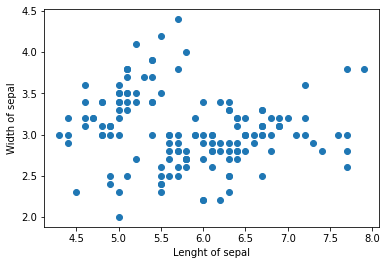

In [35]:
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(df['sepal_length'],df['sepal_width'])
# Name your axes
plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

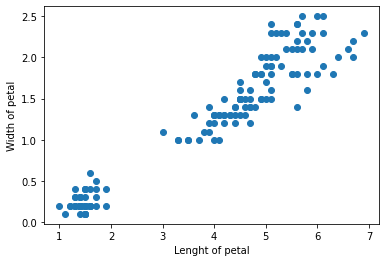

In [36]:
# Create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(df['petal_length'],df['petal_width'])
# Name your axes
plt.xlabel('Lenght of petal')
plt.ylabel('Width of petal')
plt.show()

## Clustering (unscaled data)

Separate the original data into 2 clusters.

In [37]:
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(df)

KMeans(n_clusters=2)

In [38]:
# predict the cluster for each observation
df['cluster_pred']=kmeans.fit_predict(df)

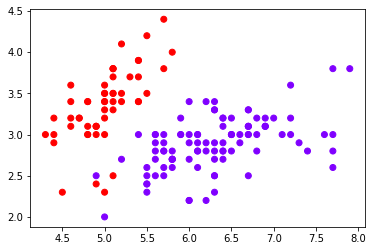

In [39]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(df['sepal_length'], df['sepal_width'], c= df['cluster_pred'], cmap='rainbow')

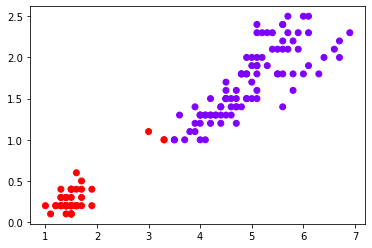

In [40]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster_pred'], cmap='rainbow')

## Standardize the variables

Import and use the <i> scale </i> function from sklearn to standardize the data. 

In [41]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [ ]:
x_scaled

## Clustering (scaled data)

In [43]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [44]:
# predict the cluster for each observation
df['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

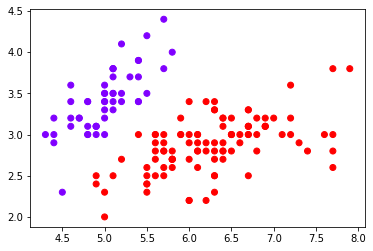

In [45]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster_pred'], cmap='rainbow')

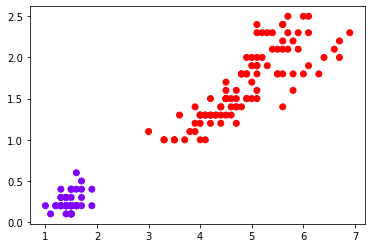

In [46]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster_pred'], cmap='rainbow')

## Take Advantage of the Elbow Method

### WCSS

In [47]:
wcss = []

for i in range (1, 10):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.68221609937967,
 91.08427095298268,
 81.72163411743452,
 71.31982095188795,
 64.0611724112173,
 56.14162232101934]

### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

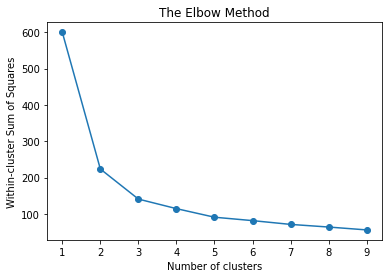

In [48]:
plt.plot(range(1, 10), wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

## Understanding the Elbow Curve

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2, 3 or 5 seem the most likely.

## 2 clusters

In [59]:
kmeans= KMeans(2)
kmeans.fit(x_scaled)

KMeans(n_clusters=2)

In [60]:
df['cluster_pred'] = kmeans.fit_predict(x_scaled)

In [ ]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster_pred'], cmap='rainbow')

In [ ]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster_pred'], cmap='rainbow')

## 3 Clusters

In [81]:
kmeans= KMeans(3)
kmeans.fit(x_scaled)

KMeans(n_clusters=3)

In [82]:
df['cluster_pred'] = kmeans.fit_predict(x_scaled)

In [ ]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster_pred'], cmap='rainbow')

In [ ]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster_pred'], cmap='rainbow')

## 5 Clusters

In [68]:
kmeans= KMeans(5)
kmeans.fit(x_scaled)

KMeans(n_clusters=5)

In [69]:
df['cluster_pred'] = kmeans.fit_predict(x_scaled)

In [ ]:
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['cluster_pred'], cmap='rainbow')

In [ ]:
plt.scatter(df['petal_length'], df['petal_width'], c=df['cluster_pred'], cmap='rainbow')

## Compare your solutions to the original iris dataset

The original (full) iris data is located in <i>iris_with_answers.csv</i>. Load the csv, plot the data and compare it with your solution. 

Obviously there are only 3 species of Iris, because that's the original (truthful) iris dataset.

The 2-cluster solution seemed good, but in real life the iris dataset has 3 SPECIES (a 3-cluster solution). Therefore, clustering cannot be trusted at all times. Sometimes it seems like x clusters are a good solution, but in real life, there are more (or less).

In [72]:
df_real = pd.read_csv(r'https://raw.githubusercontent.com/MarcoCalbucci/DataAnalytics/main/PredictiveModeling/Clustering/Exercises/Iris/iris_with_answers.csv')

In [73]:
df_real['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [75]:
# We use the map function to change 'setosa' --> 0, 'versicolor' --> 1, 'virginica' --> 2
df_real['species'] = df_real['species'].map({'setosa':0, 'versicolor':1 , 'virginica':2})

In [76]:
df_real.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Scatter plots (which we will use for comparison)

#### 'Real data'

Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

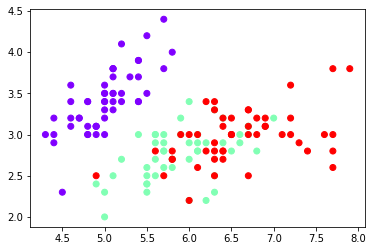

In [77]:
plt.scatter(df_real['sepal_length'], df_real['sepal_width'], c=df_real['species'], cmap='rainbow')

Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are petals and NOT sepals!

Note that 'real data' is the data observed in the real world (biological data)

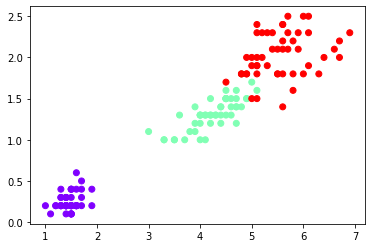

In [78]:
plt.scatter(df_real['petal_length'], df_real['petal_width'], c=df_real['species'], cmap='rainbow')

#### Our clustering solution data

It seems that our solution takes into account mainly the sepal features

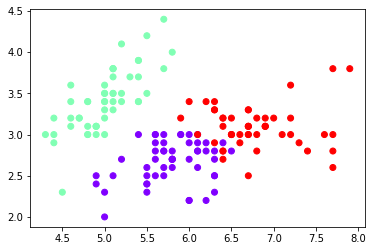

In [84]:
plt.scatter(df['sepal_length'], df['sepal_width'], c= df['cluster_pred'], cmap = 'rainbow')

Instead of the petals...

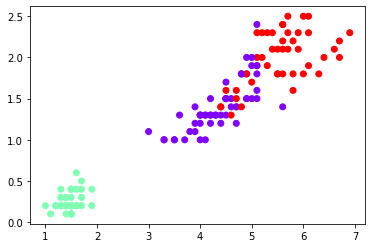

In [85]:
plt.scatter(df['petal_length'], df['petal_width'], c= df['cluster_pred'], cmap = 'rainbow')

## Further clarifications

In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3.

This shows us that:
<li> the Eblow method is imperfect (we might have opted for 2 or even 4) </li>
<li> k-means is very useful in moments where we already know the number of clusters - in this case: 3 </li>
<li> biology cannot be always quantified (or better).. quantified with k-means! Other methods are much better at that </li>